기상 데이터와 산사태 데이터의 상관성을 보기 위해 시간대와 공간을 맞추는 작업을 진행

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [40]:
weather = pd.read_csv('../data/기상/OBS_ASOS_DD_20210601231517.csv', encoding = 'cp949')
land = pd.read_csv('../data/산사태 발생이력.csv', encoding = 'cp949')

/home/suna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
print('산사태 데이터 첫 측정일 : ',land['date'].min())
print('산사태 데이터 마지막 측정일 : ',land['date'].max())
print('측정 기간동안 데이터 개수:', len(land),'개')

산사태 데이터 첫 측정일 :  20110709
산사태 데이터 마지막 측정일 :  20191003
측정 기간동안 데이터 개수: 359 개


측정 지역이 243곳, 측정 기간이 8년이 넘는데 데이터 개수가 359개 밖에 안된다  
너무 적다. 이를 염두에 두고 모델링을 진행  

In [42]:
# 산사태 데이터 측정 날짜, 이 날짜를 제외하곤 산사태 데이터가 없다
set(land['date'])

{20110709,
 20110808,
 20120917,
 20140825,
 20161005,
 20180703,
 20180826,
 20181006,
 20190720,
 20191002,
 20191003}

In [43]:
print('첫 산사태 발생일 7월 9일 밀양 지역에서 산사태 발생 지역')
print(set(land[land['date']==20110709]['sgg']))

첫 산사태 발생일 7월 9일 밀양 지역에서 산사태 발생 지역
{'산청군', '창녕군', '영천시', '청도군', '양산시', '밀양시', '진주시', '합천군', '의령군', '창원시 마산합포구', '사천시', '포항시 북구', '하동군'}


In [44]:
print('기상 데이터 측정 지역')
print(set(data['지점명']))

기상 데이터 측정 지역
{'봉화', '창원', '진주', '울진', '양산시', '밀양', '영주', '영천', '경주시', '거창', '거제', '산청', '북창원', '구미', '청송군', '통영', '의령군', '김해시', '의성', '안동', '영덕', '상주', '울릉도', '포항', '합천', '함양군', '문경', '남해'}


위에 겹치는 지역 중 밀양을 대표로 기상 데이터를 살펴보자

In [45]:
MY = weather[weather['지점명']=='밀양']

In [46]:
MY['일시'] = pd.to_datetime(MY['일시'])

/home/suna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


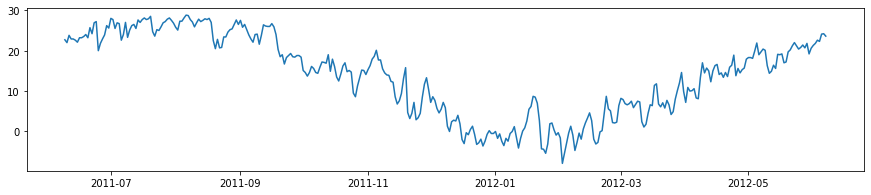

In [51]:
plt.figure(figsize=(15,3))
plt.plot(MY['일시'].iloc[:365],MY['평균기온(°C)'].iloc[:365])

밀양의 일 강수량을 시계열 그래프로 그려보니 하나의 피크를 볼 수 있다  
아래와 같이 해당 시간에 대해 확장해보니 2011년 7월 9일 임을 확인할 수 있다.  

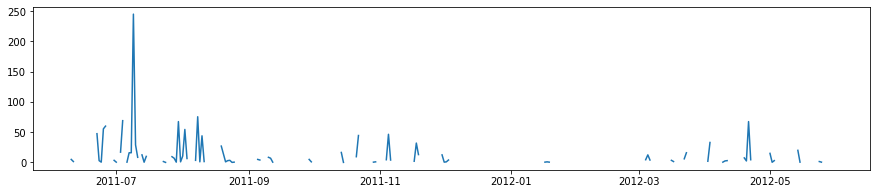

In [52]:
plt.figure(figsize=(15,3))
plt.plot(MY['일시'].iloc[:365],MY['일강수량(mm)'].iloc[:365])

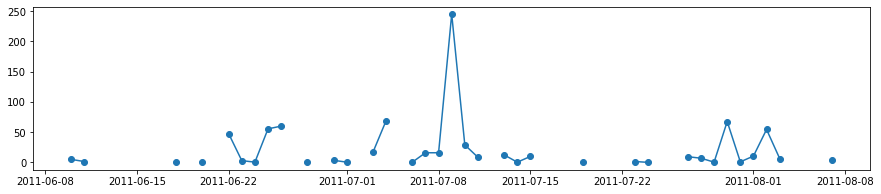

In [55]:
plt.figure(figsize=(15,3))
plt.plot(MY['일시'].iloc[:60],MY['일강수량(mm)'].iloc[:60],'-o')

그냥 드는 호기심  
산사태가 발생하지 않은 지역은 7월 9일에 비가 오지 않았나?  

In [76]:
rain_0709 = ['영천','양산시','밀양', '진주', '의령군','포항','창원','북창원', '산청','합천']
Nrain_0709 = ['봉화','울진','영주', '경주시', '거창','거제','구미', '청송군','통영', '김해시', '의성', '안동','영덕', '상주', '울릉도','함양군', '문경', '남해']

영천


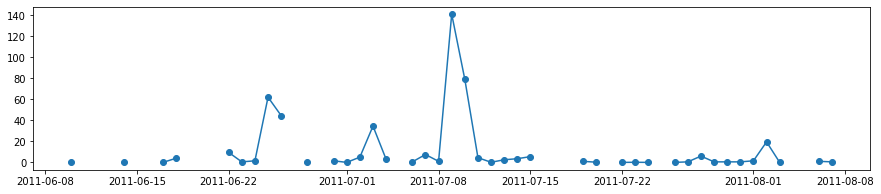

양산시


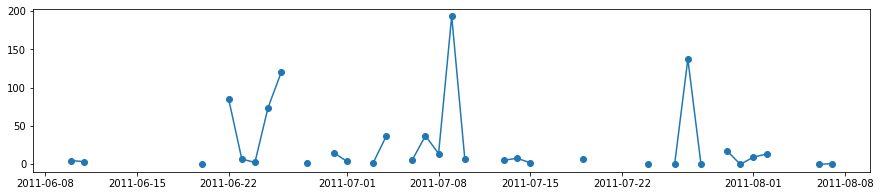

밀양


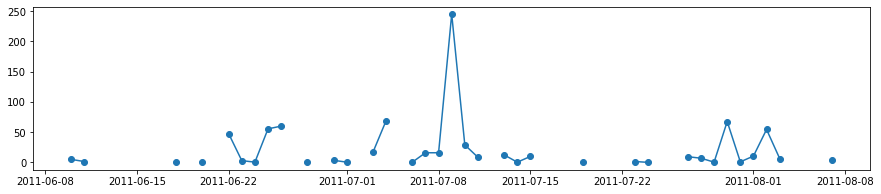

진주


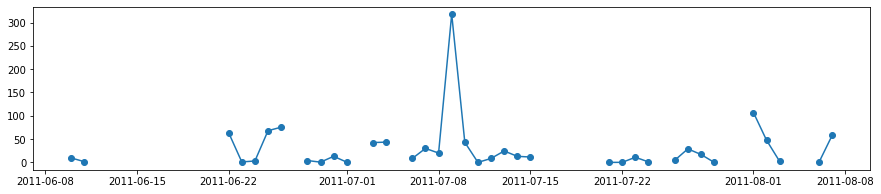

의령군


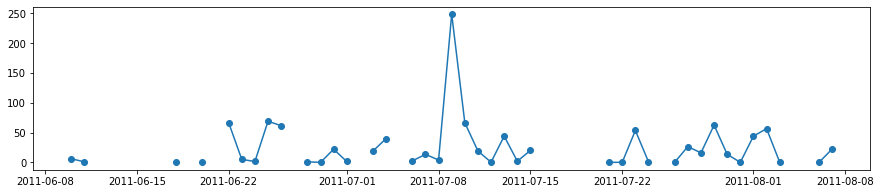

포항


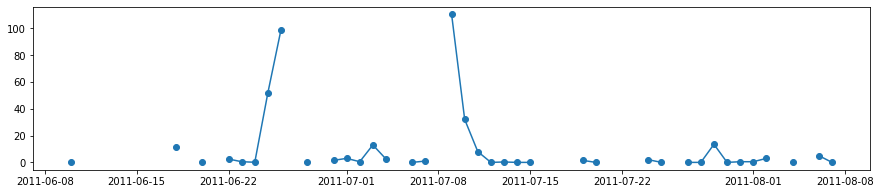

창원


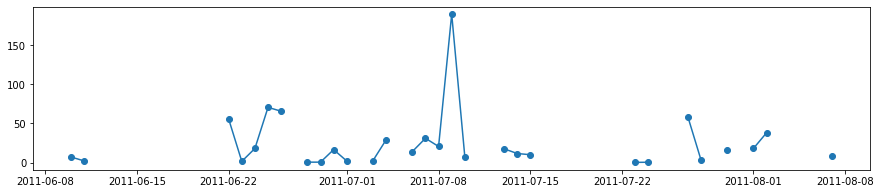

북창원


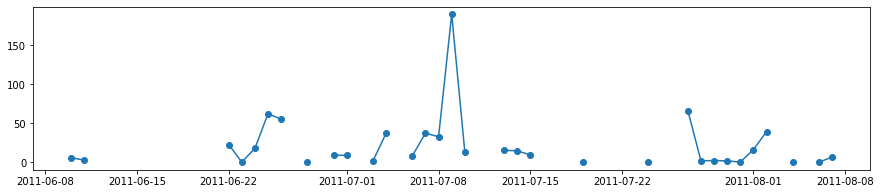

산청


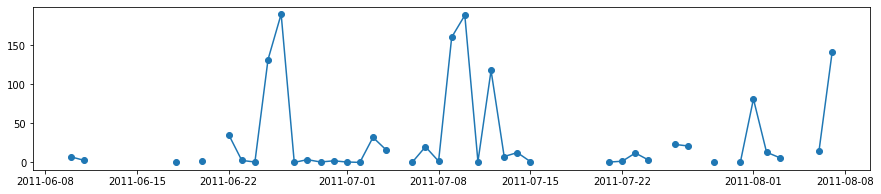

합천


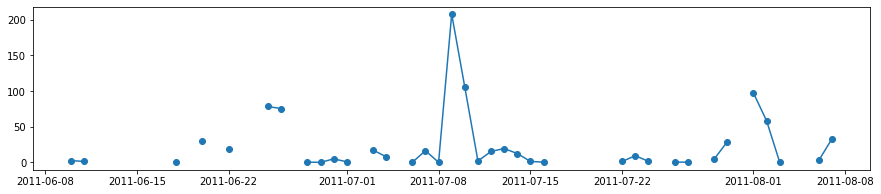

In [77]:
# 산사태가 발생한 지역의 일 강수량
for region in rain_0709:
    print(region)
    tmp = weather[weather['지점명']==region]
    tmp['일시'] = pd.to_datetime(tmp['일시'])
    plt.figure(figsize=(15,3))
    plt.plot(tmp['일시'].iloc[:60],tmp['일강수량(mm)'].iloc[:60],'-o')
    plt.show()

봉화


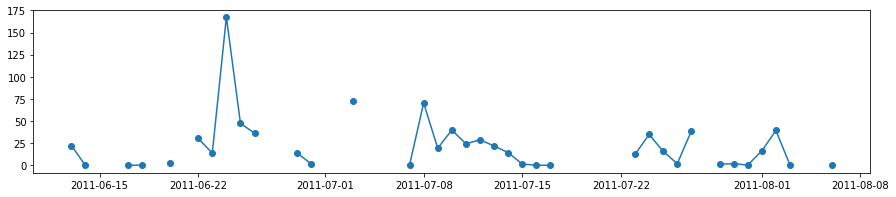

울진


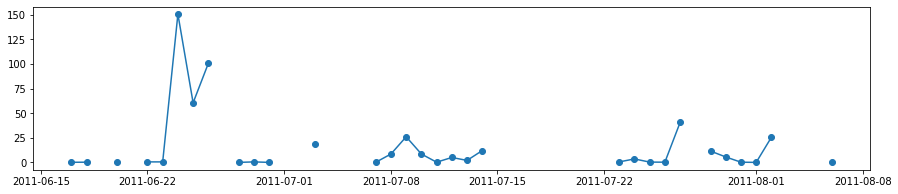

영주


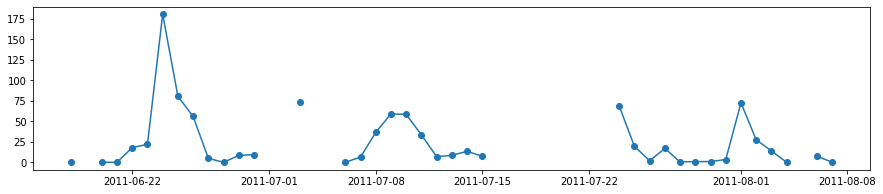

경주시


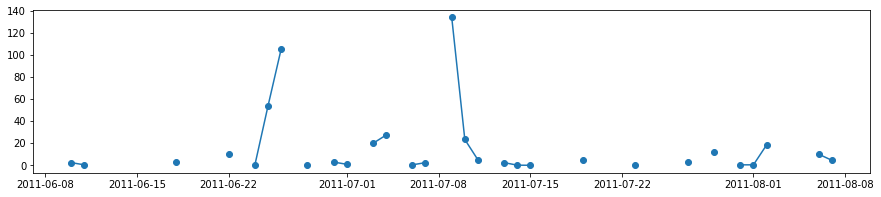

거창


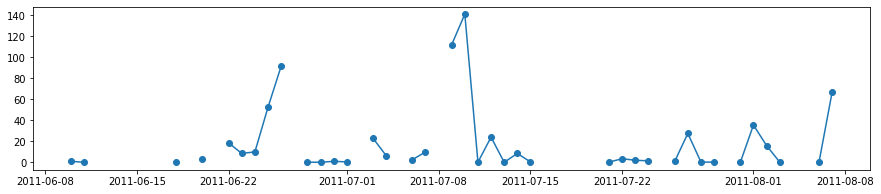

거제


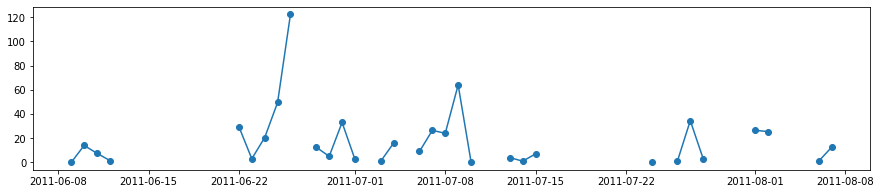

구미


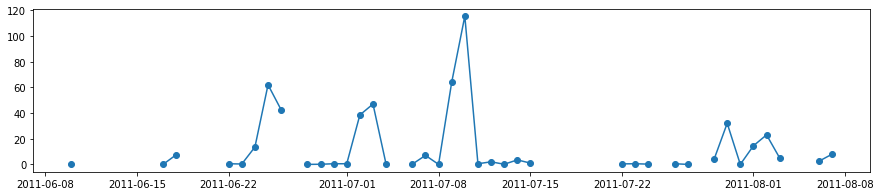

청송군


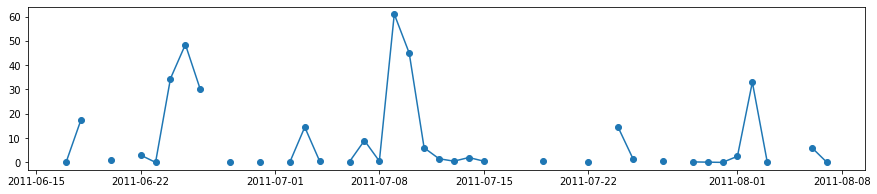

통영


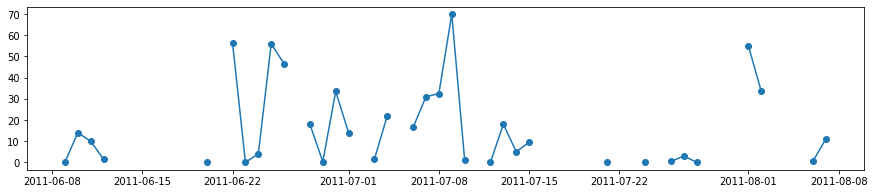

김해시


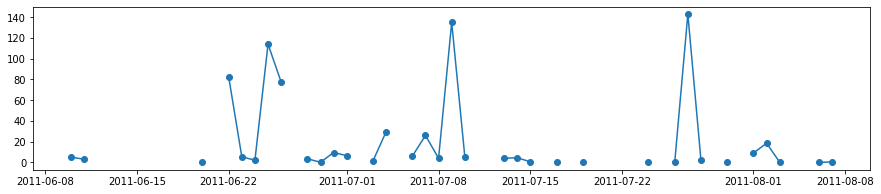

의성


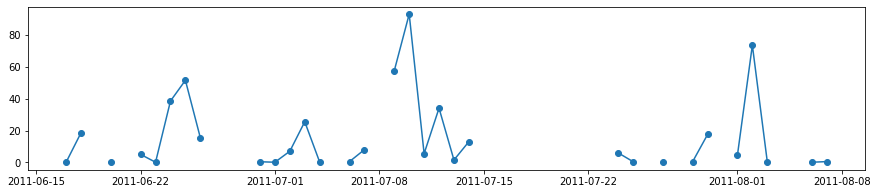

안동


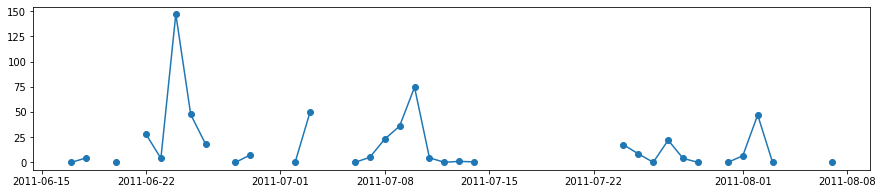

영덕


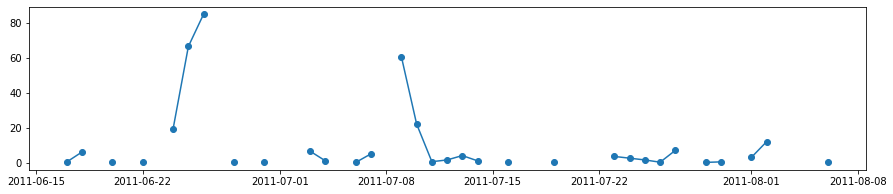

상주


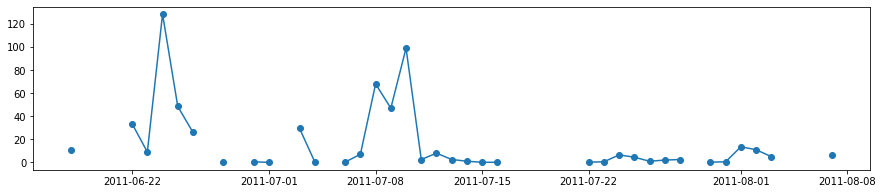

울릉도


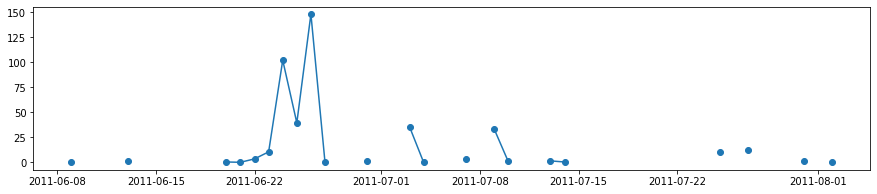

함양군


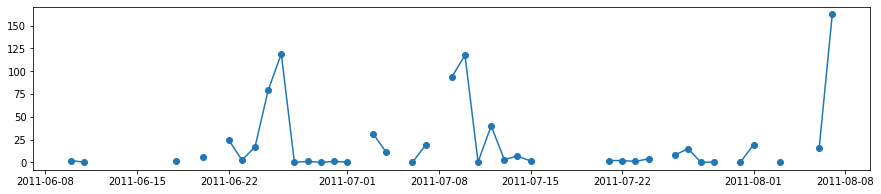

문경


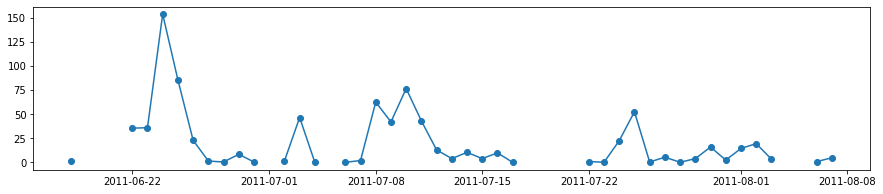

남해


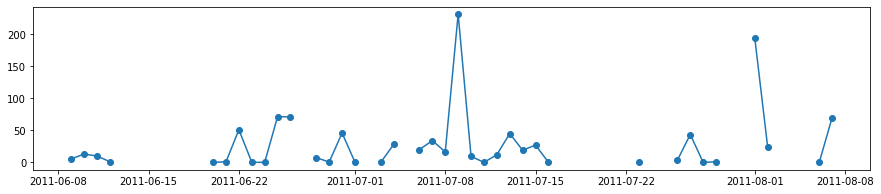

In [78]:
# 산사태가 발생하지 않은 지역의 일 강수량
for region in Nrain_0709:
    print(region)
    tmp = weather[weather['지점명']==region]
    tmp['일시'] = pd.to_datetime(tmp['일시'])
    plt.figure(figsize=(15,3))
    plt.plot(tmp['일시'].iloc[:60],tmp['일강수량(mm)'].iloc[:60],'-o')
    plt.show()

산사태가 발생한 지역에 대해선 산사태 발생일의 일 강수량이 갑자기 증가한 것을 확인할 수 있다  
산사태가 발생하지 않은 지역에 대해서도 일 강수량이 증가한 지역이 있는데 이는 측정 센서와 산사태 발생 지역의 거리를 살펴보고 연관성을 찾아보려한다.  